In [1]:
import os
import string
import numpy as np
import pandas as pd
import re
import nltk
import spacy
from spacy import displacy
from sklearn.model_selection import train_test_split

nlp = spacy.load('en_core_web_lg')

### Read Data

In [2]:
root_folder = r'D:\Courses\4th year\2nd term\NLP\Projects\News Group\20_newsgroups'
sub_folders = os.listdir(root_folder)
len(sub_folders)

20

In [3]:
sub_folders

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
def read_data(root_folder, sub_folders):

    data, labels = [], []
    
    for folder in sub_folders:
        path = os.path.join(root_folder, folder)
        samples = os.listdir(path)

        for sample in samples:
            sample_path = os.path.join(path, sample)
            text = open(sample_path, encoding='iso-8859-1')   # 'latin-1')
            data.append(text.read())
            labels.append(folder)
    
    return data, labels

In [5]:
data, labels = read_data(root_folder, sub_folders)

print(len(data))
print(len(labels))

19997
19997


In [6]:
print(labels[1200])
print('-' * 50 , end='\n\n')
print(data[1200])

comp.graphics
--------------------------------------------------

Newsgroups: comp.graphics
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!pacific.mps.ohio-state.edu!linac!uwm.edu!cs.utexas.edu!sdd.hp.com!elroy.jpl.nasa.gov!ames!haven.umd.edu!darwin.sura.net!martha.utcc.utk.edu!utkvx.utk.edu!haston
From: haston@utkvx.utk.edu (Haston, Donald Wayne)
Subject: Church related graphics
Message-ID: <16APR199317585997@utkvx.utk.edu>
News-Software: VAX/VMS VNEWS 1.41    
Keywords: Christian graphics
Sender: usenet@martha.utcc.utk.edu (USENET News System)
Organization: University of Tennessee Computing Center
Date: Fri, 16 Apr 1993 22:58:00 GMT
Lines: 13

I am looking for some good quality graphics files which are
suitable for use in church-related presentations. I prefer vector,
but anything would be helpful.

If you know of bulletin boards which have collections of this nature, or
commercial products, please inform me by email:



### Some Visualization Methods

comp.graphics


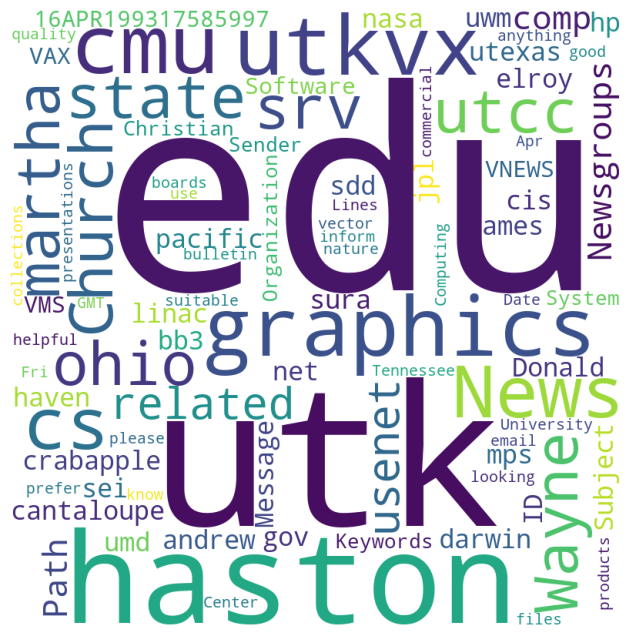

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print(labels[1200])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(data[1200])

# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [8]:
print(labels[1200])
print('-' * 50 , end='\n\n')
displacy.render(nlp(data[1200]), style = "ent",jupyter = True)

comp.graphics
--------------------------------------------------



In [9]:
# displacy.render(nlp(data[1200]), style = "dep",jupyter = True, options={'distance': 80,})
# displacy.render(nlp(data[1200]), style="dep", options={"compact": True, "bg": "#09a3d5",
#                                            'distance': 80,"color": "white",
#                                            "font": "Source Sans Pro"})

### Clean Header

In [10]:
def clean_header(text):
    text = re.sub(r'(From:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(Subject:[^\n]+\n)', '', text)
    text = re.sub(r'(([\sA-Za-z0-9\-]+)?[A|a]rchive-name:[^\n]+\n)', '', text)
    text = re.sub(r'(Last-modified:[^\n]+\n)', '', text)
    text = re.sub(r'(Version:[^\n]+\n)', '', text)

    return text

### Clean Text

In [11]:
re_url = re.compile(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
re_email = re.compile('(?:[a-z0-9!#$%&\'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&\'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9]))\.){3}(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9])|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])')                 

def clean_text(text):        
    text = text.lower()
    text = text.strip()
    text = re.sub(re_url, '', text)
    text = re.sub(re_email, '', text)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'(\d+)', ' ', text)
    text = re.sub(r'(\s+)', ' ', text)
    
    return text

In [12]:
for i in range(len(data)):
    data[i] = clean_text(clean_header(data[i]))

### Tokenaization & Remove Stopwords
- stopwords tokens can be removed from a Doc object by creating a new Doc object without the unwanted tokens.

- You can remove tokens by converting doc to numpy array, removing from numpy array and then converting back to doc.

In [13]:
from spacy.attrs import LOWER, POS, ENT_TYPE, IS_ALPHA, LEMMA
from spacy.tokens import Doc

def remove_stopwords(doc):
    indexes = []
    for index, token in enumerate(doc):
        if token.is_stop:
            indexes.append(index)
    np_array = doc.to_array([LOWER, POS, ENT_TYPE, IS_ALPHA, LEMMA])
    np_array = np.delete(np_array, indexes, axis = 0)
    doc2 = Doc(doc.vocab, words=[t.text for i, t in enumerate(doc) if i not in indexes])
    doc2.from_array([LOWER, POS, ENT_TYPE, IS_ALPHA, LEMMA], np_array)
    return doc2

In [14]:
Docs = []
for i in range(len(data)):
    Docs.append(remove_stopwords(nlp(data[i])))
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


### Lemmatization

In [33]:
str(Docs[0])

'xref cantaloupesrvcscmuedu altatheism altatheismmoderated newsanswers altanswers path cantaloupesrvcscmueducrabapplesrvcscmuedubb andrewcmuedunewsseicmueducisohiostateedumagnusacsohiostateeduusenetinscwrueduagatespoolmueduuunetpipexibmpcugmantismathew newsgroups altatheismaltatheismmoderatednewsanswersaltanswers summary books addresses music related atheism keywords faq atheism books music fiction addresses contacts messageid date mon mar gmt expires thu apr gmt followupto altatheism distribution world organization mantis consultants cambridge uk approved supersedes lines atheist resources addresses atheist organizations usa freedom religion foundation darwin fish bumper stickers assorted atheist paraphernalia available freedom religion foundation write ffrf po box madison wi telephone evolution designs evolution designs sell darwin fish fish symbol like ones christians stick cars feet word darwin written inside deluxe moulded d plastic fish postpaid write evolution designs laurel can

In [34]:
lemmas_ = ' '.join(token.lemma_ for token in Docs[0])
lemmas_

'xref cantaloupesrvcscmuedu altatheism altatheismmoderated newsanswers altanswer path cantaloupesrvcscmueducrabapplesrvcscmuedubb andrewcmuedunewsseicmueducisohiostateedumagnusacsohiostateeduusenetinscwrueduagatespoolmueduuunetpipexibmpcugmantismathew newsgroups altatheismaltatheismmoderatednewsanswersaltanswer summary book address music relate atheism keyword faq atheism book music fiction address contact messageid date mon mar gmt expire thu apr gmt followupto altatheism distribution world organization mantis consultant cambridge uk approve supersede line atheist resource address atheist organization usa freedom religion foundation darwin fish bumper sticker assort atheist paraphernalia available freedom religion foundation write ffrf po box madison wi telephone evolution design evolution design sell darwin fish fish symbol like one christians stick car foot word darwin write inside deluxe mould d plastic fish postpaid write evolution design laurel canyon north hollywood people san f

In [35]:
final_data = []
for i in range(len(Docs)):
    lemmas_ = ' '.join(token.lemma_ for token in Docs[i])
    final_data.append(lemmas_)
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


### TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=5000)
vectors = vectorizer.fit_transform(final_data)

In [37]:
vectors.shape

(19997, 5000)

In [38]:
vectors.data

array([0.02774534, 0.01943687, 0.0144433 , ..., 0.11872618, 0.07021967,
       0.07020382])

### Split Data

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

In [40]:
encoded_labels

array([ 0,  0,  0, ..., 19, 19, 19], dtype=int64)

In [41]:
X_train, X_val, y_train, y_val = train_test_split(vectors, encoded_labels, test_size=0.3, stratify=labels, shuffle=True)

In [42]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(13997, 5000)
(6000, 5000)
(13997,)
(6000,)


### RandomForest

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred = rf.predict(X_val)
print(y_pred[:24])
print(y_val[:24])

[15  9 10  8 13 14  3  5  0 14 19  7 11 18  8  0 17 13  6 17  0 18  1  7]
[15  9 10  8 13 14  3  5  0 14 19  7 11 18  8  0 17 13  6 17  0 16  1  7]


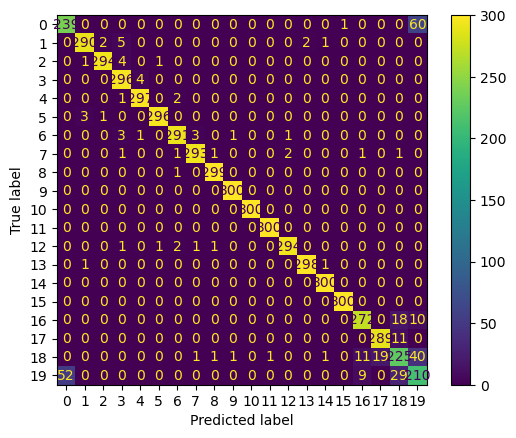

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [46]:
print(f"Train Accuracy: {rf.score(X_train, y_train)*100:.3f}%")
print(f"Test Accuracy: {rf.score(X_val, y_val)*100:.3f}%")

Train Accuracy: 98.171%
Test Accuracy: 94.717%


### MLP

In [47]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [48]:
y_pred = mlp.predict(X_val)

print(y_pred[:24])
print(y_val[:24])

[15  9 10  8 13 14  3  5  0 14 19  7 11 18  8  0 17 13  6 17  0 18  1  7]
[15  9 10  8 13 14  3  5  0 14 19  7 11 18  8  0 17 13  6 17  0 16  1  7]


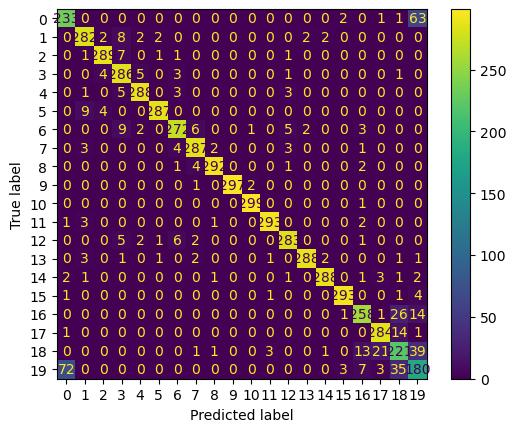

In [49]:
cm = confusion_matrix(y_val,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [50]:
print(f"Train Accuracy: {mlp.score(X_train, y_train)*100:.3f}%")
print(f"Test Accuracy: {mlp.score(X_val, y_val)*100:.3f}%")

Train Accuracy: 98.171%
Test Accuracy: 91.667%
